# Modeling 1

Classification algorithms used: logistic regression, SVM, decision tree

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import math
from scipy import stats
from sklearn import preprocessing

import itertools
import plot_confusion_matrix_copy.py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [13]:
# read in cleaned data
data = pd.read_csv('model_data1.csv')

In [14]:
# Isolate Dependent Variable
well = data['status_group']

In [15]:
# Isolate Independent Variable
predictors = data.drop(['status_group', 'id'], axis=1)

In [16]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(predictors, well, test_size = 0.25, random_state = 0)

# Logistic Regression

In [17]:
lr = LogisticRegression()
logit = lr.fit(x_train, y_train)

In [18]:
# Make Predictions
y_pred = logit.predict(x_test)

In [19]:
# Take a look at raw accuracy
accuracy_score(y_test, y_pred)

0.73943397642819608

In [24]:
# What is the f1 score?
f1_score(y_test, y_pred, average='weighted')

0.71408784418547888

In [36]:
confusion_matrix(y_test, y_pred)

array([[6546,   41,  699],
       [ 738,   66,  185],
       [1789,   19, 3238]], dtype=int64)

Confusion matrix, without normalization
[[6546   41  699]
 [ 738   66  185]
 [1789   19 3238]]


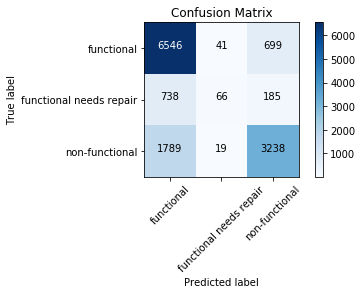

In [26]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      classes=['functional', 'functional needs repair', 'non-functional'], title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.9   0.01  0.1 ]
 [ 0.75  0.07  0.19]
 [ 0.35  0.    0.64]]


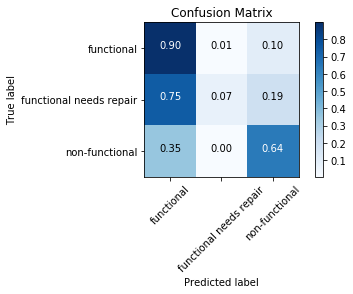

In [27]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Most waterpoints that are functional are classified correctly; however, at the same time, a large majority of water points were functional in the data. Logistic regression does a poor job with classifying the 'functional needs repair' group and recognizes most of these as functional, as technically, these are not yet non-functional.

# Decision Trees

In [37]:
dectree = tree.DecisionTreeClassifier()
dectree = dectree.fit(x_train, y_train)

In [38]:
y_predtree = dectree.predict(x_test)

In [30]:
# Take a look at raw accuracy
accuracy_score(y_test, y_predtree)

0.74979355904211398

In [45]:
# What is the percentage of labels predicted correctly? (Recall)
f1_score(y_test, y_pred, average='weighted')

0.71408784418547888

In [46]:
# confusion matrix
confusion_matrix(y_test, y_predtree)

array([[5825,  383, 1078],
       [ 464,  359,  166],
       [1070,  167, 3809]], dtype=int64)

Confusion matrix, without normalization
[[5825  383 1078]
 [ 464  359  166]
 [1070  167 3809]]


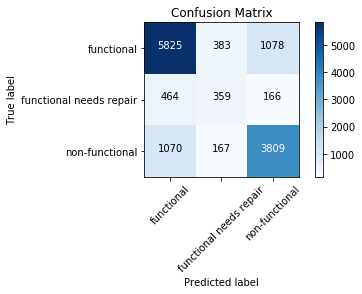

In [47]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_predtree), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.8   0.05  0.15]
 [ 0.47  0.36  0.17]
 [ 0.21  0.03  0.75]]


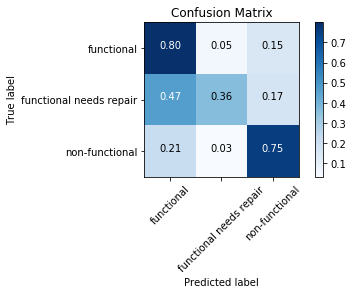

In [48]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_predtree), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Decision tree is less accurate at identifying functional water points compared to logistic regressions, but there is significant improvement for accurately predicting non-functional wells. Notably, using a decision tree also does a better job at differentiating the water points that need repair from the functional water points, making the use of decision trees a better choice than logistic regression.

# Support Vector Machine

In [39]:
clf = LinearSVC()
clf.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [49]:
y_pred2 = clf.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred2)

0.61301704076270547

In [50]:
# What is the f1 score? 
f1_score(y_test, y_pred2, average='weighted')

0.58430351772738565

In [51]:
confusion_matrix(y_test, y_pred2)

array([[6028,  126, 1132],
       [ 667,  111,  211],
       [2978,   41, 2027]], dtype=int64)

Confusion matrix, without normalization
[[6028  126 1132]
 [ 667  111  211]
 [2978   41 2027]]


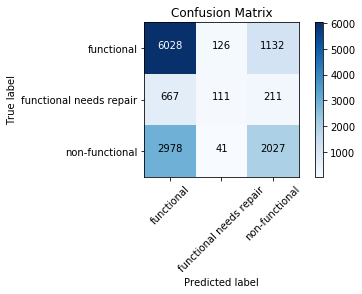

In [43]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred2), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.83  0.02  0.16]
 [ 0.67  0.11  0.21]
 [ 0.59  0.01  0.4 ]]


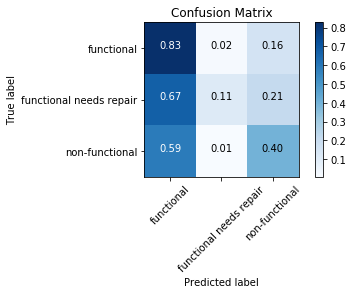

In [44]:

plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred2), 
                     classes=['functional', 'functional needs repair', 'non-functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Support machine does the worst job in classifying water points. Most water points are recognized as functional.

# Random Forest

In [53]:
clf2 = RandomForestClassifier()
clf2 = clf2.fit(x_train, y_train)

In [54]:
y_pred4 = clf2.predict(x_test)

In [55]:
accuracy_score(y_test, y_pred4)

0.79003077847008485

In [56]:
f1_score(y_test, y_pred4, average='weighted')

0.78449607432992374

In [57]:
confusion_matrix(y_test, y_pred4)

array([[6376,  249,  661],
       [ 504,  340,  145],
       [1137,  101, 3808]], dtype=int64)

Normalized confusion matrix
[[ 0.88  0.03  0.09]
 [ 0.51  0.34  0.15]
 [ 0.23  0.02  0.75]]


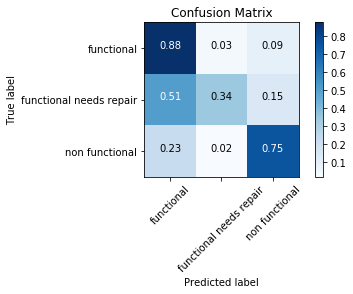

In [58]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred4), 
                      classes=['functional', 'functional needs repair', 'non functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

With the ability to ensemble multiple decision trees, Random Forest has achieved the highest f1 score.